In [2]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [5]:
dataSealvl=pd.read_csv("data/EarthViewer/EarthViewer_Data/SEALVL.txt",header=0,sep="/")

In [6]:
dataSealvl

,A,Freq,filecycle,year,observations,weighted_obs,GMSL_NO_GIA_20y,STD_GMLS,GMSL_SMOOTH_NO_GIA_20y,GMSL_SI_GIA_20y,STD_GMSL_SI_GIA,11_GMSL_SMOOTH_SI_GIA_20y,GMSL_SMOOTH_NOANUAL_20y
0,NaN,0,11,1993.011526,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1,NaN,0,12,1993.038692,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
2,NaN,0,13,1993.065858,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60
3,NaN,0,14,1993.093025,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45
4,NaN,0,15,1993.120191,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,0,1013,2020.214983,477607,344359.59,45.89,98.80,46.85,53.36,101.27,54.38,56.46
1002,NaN,0,1014,2020.242075,479899,345641.59,47.05,99.30,46.79,54.59,101.69,54.32,56.61
1003,NaN,0,1015,2020.269167,477366,343801.09,47.61,98.83,46.74,55.20,101.39,54.27,56.83
1004,NaN,0,1016,2020.296259,480955,344891.19,45.26,96.20,46.69,52.83,98.67,54.23,57.10


In [7]:
dataSealvl.drop(["A"],axis=1,inplace=True)

In [8]:
dataSealvl.set_index(["year"])

,Freq,filecycle,observations,weighted_obs,GMSL_NO_GIA_20y,STD_GMLS,GMSL_SMOOTH_NO_GIA_20y,GMSL_SI_GIA_20y,STD_GMSL_SI_GIA,11_GMSL_SMOOTH_SI_GIA_20y,GMSL_SMOOTH_NOANUAL_20y
year,,,,,,,,,,,
1993.011526,0,11,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1993.038692,0,12,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
1993.065858,0,13,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60
1993.093025,0,14,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45
1993.120191,0,15,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44
...,...,...,...,...,...,...,...,...,...,...,...
2020.214983,0,1013,477607,344359.59,45.89,98.80,46.85,53.36,101.27,54.38,56.46
2020.242075,0,1014,479899,345641.59,47.05,99.30,46.79,54.59,101.69,54.32,56.61
2020.269167,0,1015,477366,343801.09,47.61,98.83,46.74,55.20,101.39,54.27,56.83


(1993.0, 2020.5)

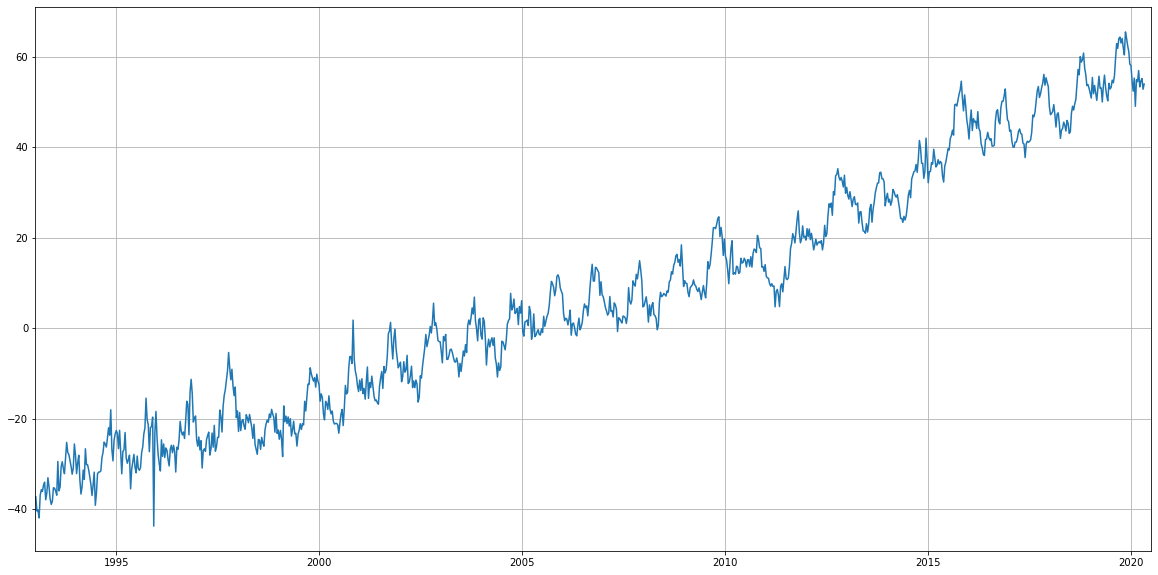

In [9]:
plt.figure(figsize=(20,10))
plt.plot(dataSealvl["year"],dataSealvl["GMSL_SI_GIA_20y"])
plt.grid()
plt.xlim(1993,2020.5)


In [36]:
def func(x,a,b,c,d,e,f,g,h):
    return a+b*x+ c*np.cos(d*x+e)+f*np.sin(g*x+h)

nres_max, cov_max = optimize.curve_fit(func,dataSealvl["year"], dataSealvl["GMSL_SI_GIA_20y"])


In [37]:
nres_max

array([-6.65268216e+03,  3.31870169e+00,  7.95280073e-01,  1.07920807e+00,
       -1.25491736e+02, -3.01407668e+00,  5.40277856e-01,  6.36422462e+02])

(1993.0, 2020.5)

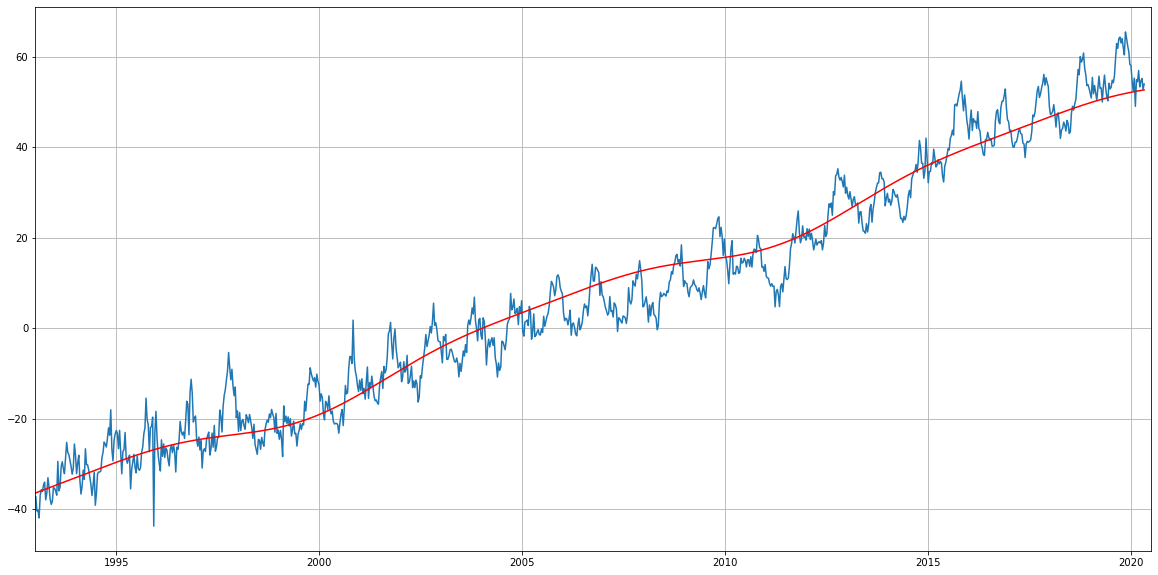

In [38]:
#nres_max[1]=0.02
plt.figure(figsize=(20,10))
plt.plot(dataSealvl["year"],dataSealvl["GMSL_SI_GIA_20y"])
plt.plot(dataSealvl["year"],func(dataSealvl["year"],*nres_max),color="red")

plt.grid()
plt.xlim(1993,2020.5)

In [39]:
nres_max, cov_max

(array([-6.65268216e+03,  3.31870169e+00,  7.95280073e-01,  1.07920807e+00,
        -1.25491736e+02, -3.01407668e+00,  5.40277856e-01,  6.36422462e+02]),
 array([[ 2.06943113e+03, -1.03114854e+00,  1.47512184e+00,
          2.59535420e-01, -5.20783392e+02, -8.37854502e-01,
         -1.40814039e-01,  2.83144461e+02],
        [-1.03114854e+00,  5.13804060e-04, -7.34455931e-04,
         -1.29610769e-04,  2.60074847e-01,  4.20359428e-04,
          7.00363401e-05, -1.40826874e-01],
        [ 1.47512184e+00, -7.34455931e-04,  5.55034308e-02,
          7.47396812e-05, -1.51973809e-01, -5.60856597e-03,
         -2.50404876e-04,  5.04533618e-01],
        [ 2.59535420e-01, -1.29610769e-04,  7.47396812e-05,
          1.77293154e-03, -3.55712056e+00, -1.21748444e-03,
          1.36712654e-04, -2.73879798e-01],
        [-5.20783392e+02,  2.60074847e-01, -1.51973809e-01,
         -3.55712056e+00,  7.13691946e+03,  2.44627948e+00,
         -2.73871544e-01,  5.48653898e+02],
        [-8.37854502e-01, 

(1993.0, 2020.5)

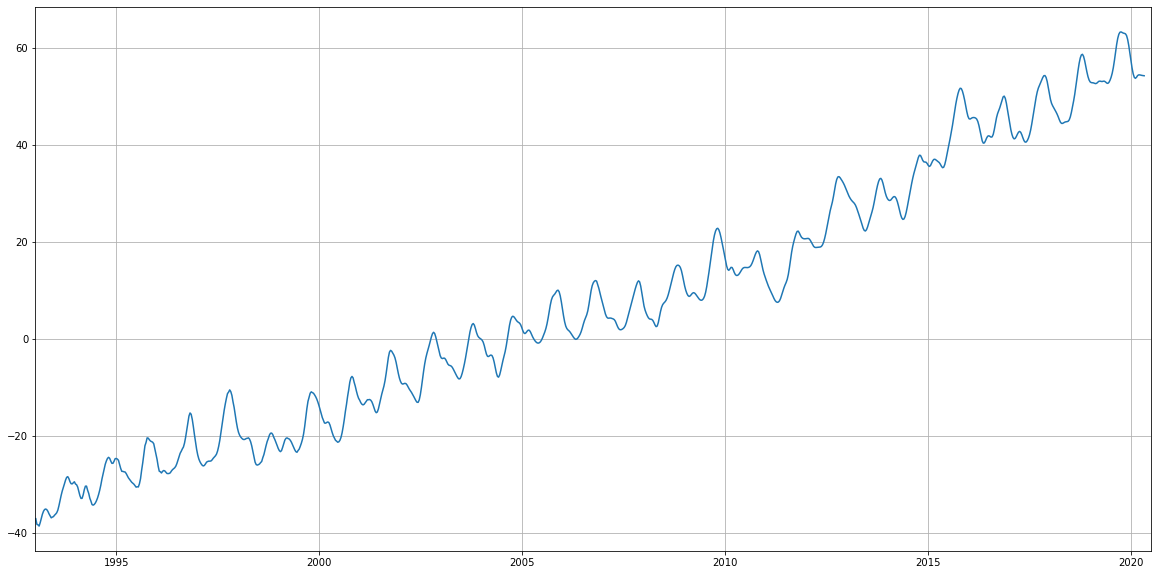

In [40]:
plt.figure(figsize=(20,10))
plt.plot(dataSealvl["year"],dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"])
plt.grid()
plt.xlim(1993,2020.5)

In [41]:
def func2(x,a,b,c,d,e,f,g,h,i,j):
    return a*x+b+c*np.sin(d*x+h)**j+e*np.cos(d*x**2+h)


SMOOTHres_max, SMOOTHcov_max = optimize.curve_fit(func,dataSealvl["year"], dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"])


(1993.0, 2020.5)

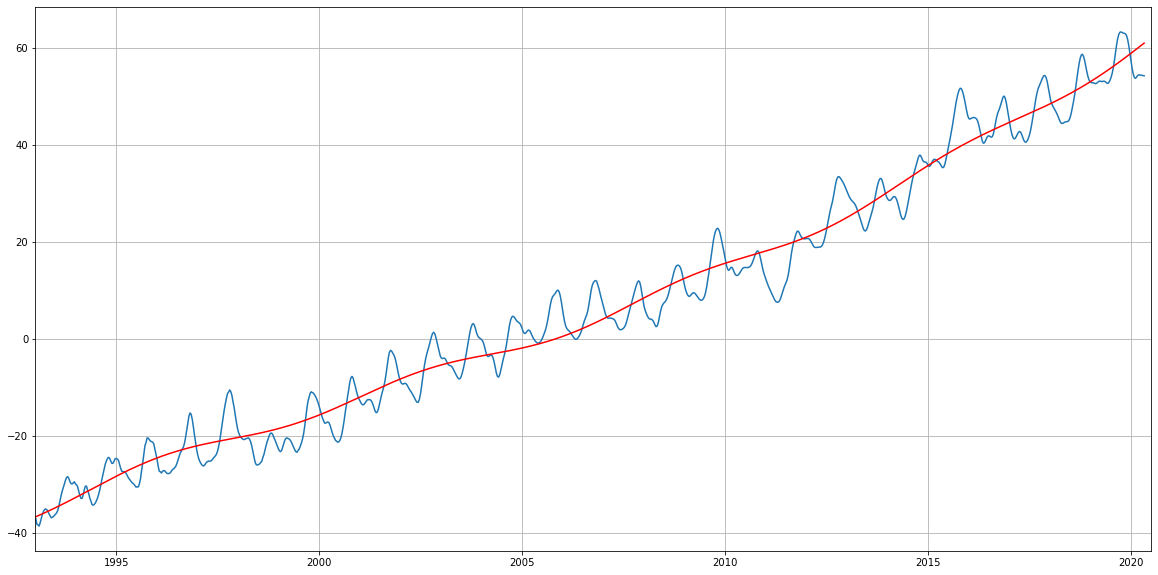

In [42]:
plt.figure(figsize=(20,10))
plt.plot(dataSealvl["year"],dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"])
plt.plot(dataSealvl["year"],func(dataSealvl["year"],*SMOOTHres_max),color="red")
plt.grid()
plt.xlim(1993,2020.5)

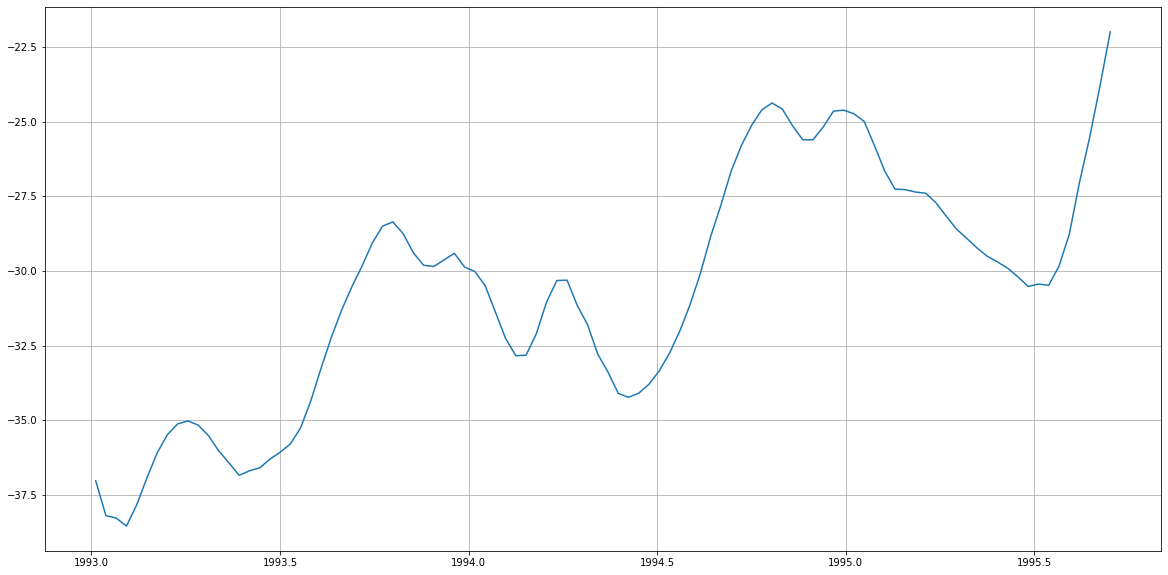

In [43]:
plt.figure(figsize=(20,10))
plt.plot(dataSealvl["year"][0:100],dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"][0:100])
plt.grid()
#plt.xlim(1993,2020.5)

In [ ]:
def func3(x,a,b,c,d,e,f,g):
    return a*x+b+c*np.sin(d*x+e)+d*x**2+e*x**3+f*x**4+g*x**5


#SHORTres_max, SHORTcov_max = optimize.curve_fit(func,dataSealvl["year"][0:100], dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"][0:100])


In [ ]:
SHORTres_max

In [69]:
GBFIT=np.loadtxt("data/EarthViewer/EarthViewer_Data/SEALVLGB.txt")

(1993.0, 2020.5)

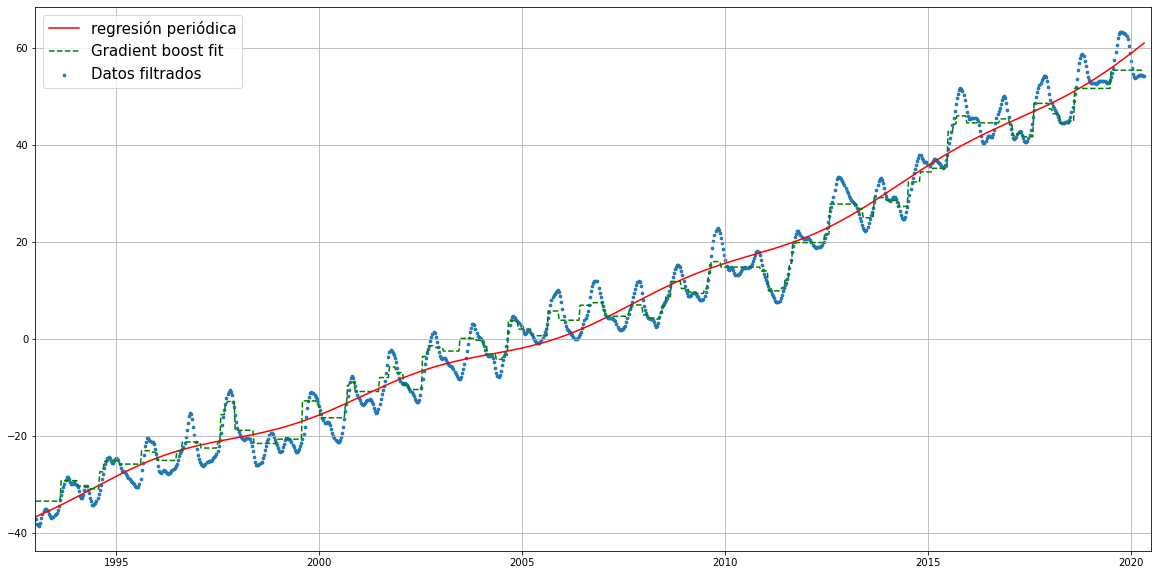

In [76]:
plt.figure(figsize=(20,10))
plt.scatter(dataSealvl["year"],dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"],label="Datos filtrados",s=7)
plt.plot(dataSealvl["year"],func(dataSealvl["year"],*SMOOTHres_max),color="red",label="regresión periódica")
plt.plot(dataSealvl["year"],GBFIT,color="green",label="Gradient boost fit",linestyle="--")

plt.grid()
plt.legend(fontsize=15)
plt.xlim(1993,2020.5)
plt.xlabel("Altura media ")

In [65]:
def ftry(x,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,a9,b9):
    return a1*np.sin(b1*x+c1)+a2*np.sin(b2*x+c2)+a3*np.sin(b3*x+c3)+a4*np.sin(b4*x+c4)+a9+b9*x

In [66]:
FOURIERres_max, FOURIERcov_max = optimize.curve_fit(ftry,dataSealvl["year"], dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"],maxfev=15000)

+a5*np.sin(b5*x+c5)+a6*np.sin(b6*x+c6)+a7*np.sin(b7*x+c7)+a8*np.sin(b8*x+c8)+a9+b9*x
,c5,c6,c7,c8
,b5,b6,b7,b8
,a5,a6,a7,a8

(1993.0, 2020.5)

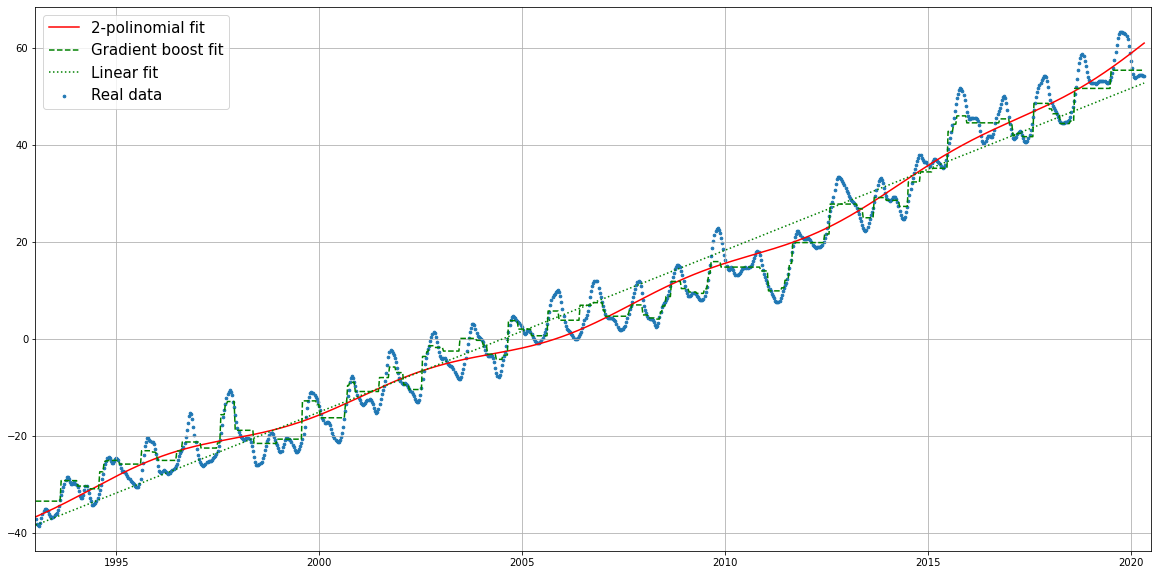

In [75]:
plt.figure(figsize=(20,10))
plt.scatter(dataSealvl["year"],dataSealvl["11_GMSL_SMOOTH_SI_GIA_20y"],label="Real data",s=7)
plt.plot(dataSealvl["year"],func(dataSealvl["year"],*SMOOTHres_max),color="red",label="2-polinomial fit")
plt.plot(dataSealvl["year"],GBFIT,color="green",label="Gradient boost fit",linestyle="--")
plt.plot(dataSealvl["year"],ftry(dataSealvl["year"],*FOURIERres_max),color="green",label="Linear fit",linestyle=":")
plt.grid()
plt.legend(fontsize=15)
plt.xlim(1993,2020.5)

In [157]:
lateco2=pd.read_csv("data/EarthViewer/EarthViewer_Data/modern_CO2.txt",header=5,sep="	")
earlyco2=pd.read_csv("data/EarthViewer/EarthViewer_Data/early_CO2.txt",header=8,sep="	")
earlyo2=pd.read_csv("data/EarthViewer/EarthViewer_Data/Oxygen.txt",header=4,sep="	")
earlyo2["%O2"]=earlyo2["%O2"].apply(lambda x: float(x.replace("%","")))
modtemp=pd.read_csv("data/EarthViewer/EarthViewer_Data/Modern_temp.txt",header=7,sep="	")
earlytemp=pd.read_csv("data/EarthViewer/EarthViewer_Data/Early_temp.txt",header=9,sep="	")
paleotemp=pd.read_csv("data/EarthViewer/EarthViewer_Data/Paleo_temp.txt",header=10,sep="	")
paleoco2=pd.read_csv("data/EarthViewer/EarthViewer_Data/Paleo_CO2.txt",header=9,sep="	")
modbio=pd.read_csv("data/EarthViewer/EarthViewer_Data/Modern_biodiversity.txt",header=6,sep="	")

In [158]:
paleoco2

,Ma,%,ppm
0,0.001,0.03%,281
1,0.002,0.03%,274
2,0.002,0.03%,267
3,0.003,0.03%,265
4,0.004,0.03%,264
...,...,...,...
1897,4459.000,11.14%,111411
1898,4496.000,11.16%,111623
1899,4526.000,11.18%,111838
1900,4545.000,11.21%,112054


(4560.0, 0.0)

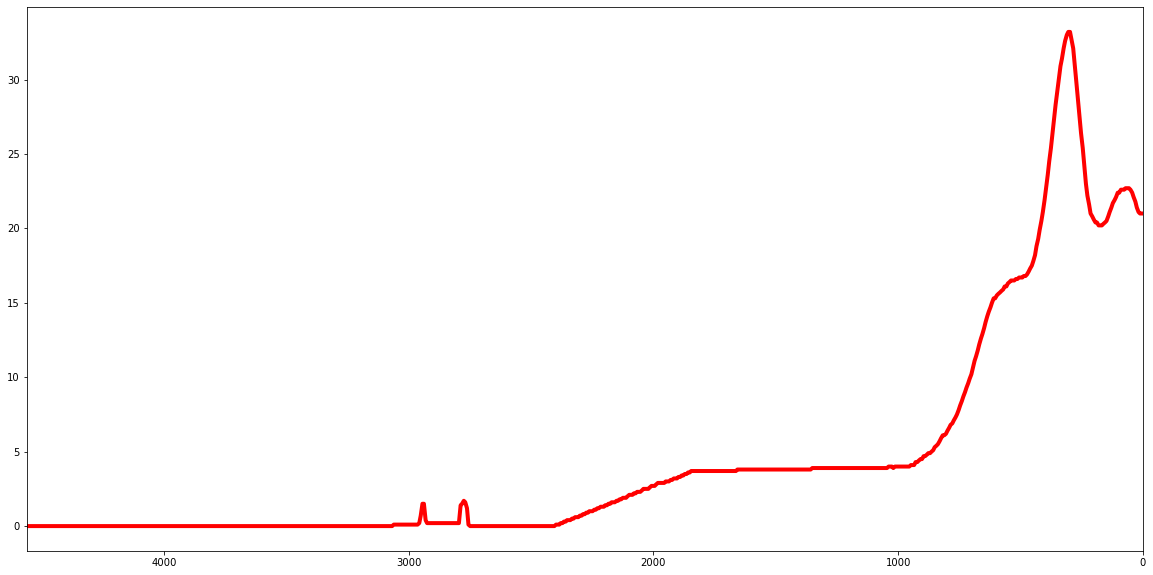

In [71]:
plt.figure(figsize=(20,10))
plt.plot(earlyo2["Ma"],earlyo2["%O2"],c="red",linewidth=4)
plt.xlim(4560, 0)

Text(0, 0.5, '$O_2$ concentration (%)')

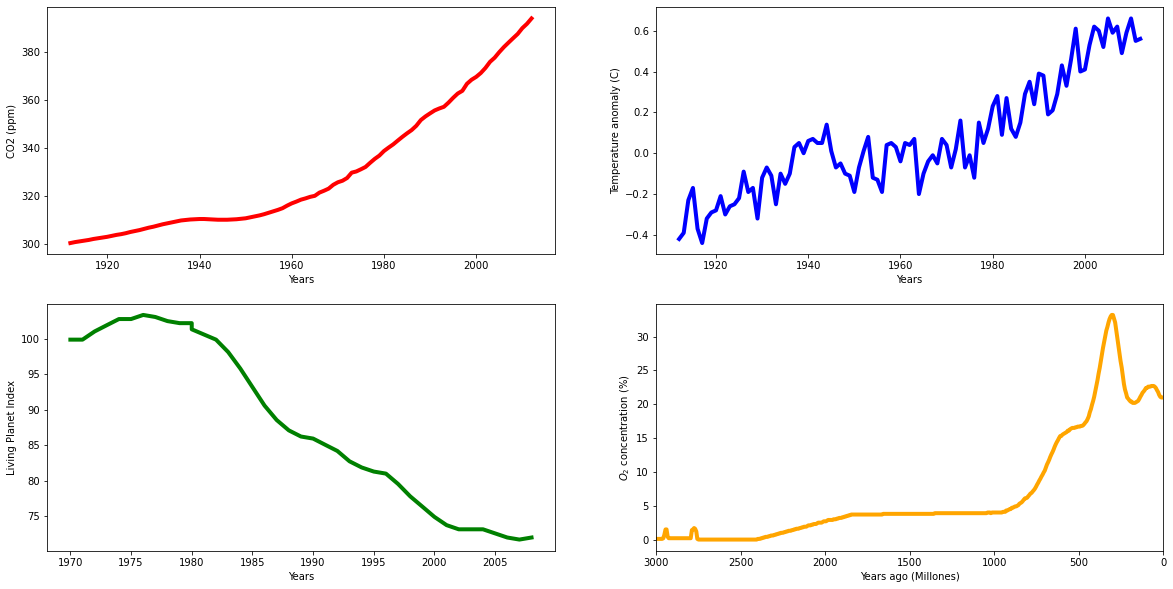

In [116]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
#plt.plot(earlyo2["Ma"],earlyo2["%O2"],c="red",linewidth=4)
plt.plot(lateco2["Year"],lateco2["CO2 (ppm)"],c="red",linewidth=4)
plt.xlabel("Years")
plt.ylabel("CO2 (ppm)")
plt.subplot(2,2,2)
plt.plot(modtemp["Year"],modtemp["Temperature anomaly (C)"],c="b",linewidth=4)
plt.xlabel("Years")
plt.ylabel("Temperature anomaly (C)")
plt.subplot(2,2,3)
plt.plot(modbio["Year"],modbio["Living Planet Index"],c="g",linewidth=4)
plt.xlabel("Years")
plt.ylabel("Living Planet Index")
plt.subplot(2,2,4)
plt.plot(earlyo2["Ma"],earlyo2["%O2"],c="orange",linewidth=4)
plt.xlim(3000, 0)
plt.xlabel("Years ago (Millones)")
plt.ylabel("$O_2$ concentration (%)")
#plt.xlim(4560, 0)

In [108]:
def valuescloseto(X,val,umbral):
    closers=[]
    for i in range(len(X)):
        if (X[i]<(val+umbral) and X[i]>(val-umbral)):
            print(i,X[i])
            closers.append(i)
    return closers

In [242]:
oxig=valuescloseto(earlyo2["%O2"],20.95,0.1)
earlyo2["Ma"][33]

0 21.0
1 21.0
2 21.0
33 21.0


214

In [159]:
paleoco2

,Ma,%,ppm
0,0.001,0.03%,281
1,0.002,0.03%,274
2,0.002,0.03%,267
3,0.003,0.03%,265
4,0.004,0.03%,264
...,...,...,...
1897,4459.000,11.14%,111411
1898,4496.000,11.16%,111623
1899,4526.000,11.18%,111838
1900,4545.000,11.21%,112054


In [245]:
codos=valuescloseto(paleoco2["ppm"],412.15,10)
paleoco2["Ma"][1203]


741 404
742 414
1162 408
1203 414


312.0

In [139]:
codos

[97, 98, 99, 100]

In [231]:
paleoco2["Ma"][1161]

269.0

In [229]:
earlyo2["Ma"][35]

227

In [237]:
paleotemp["Ma"][154]

238

In [247]:
temps=valuescloseto(paleotemp["Temp °C"],22.4,2)

293 20.8


In [248]:
paleotemp["Ma"][293]

460

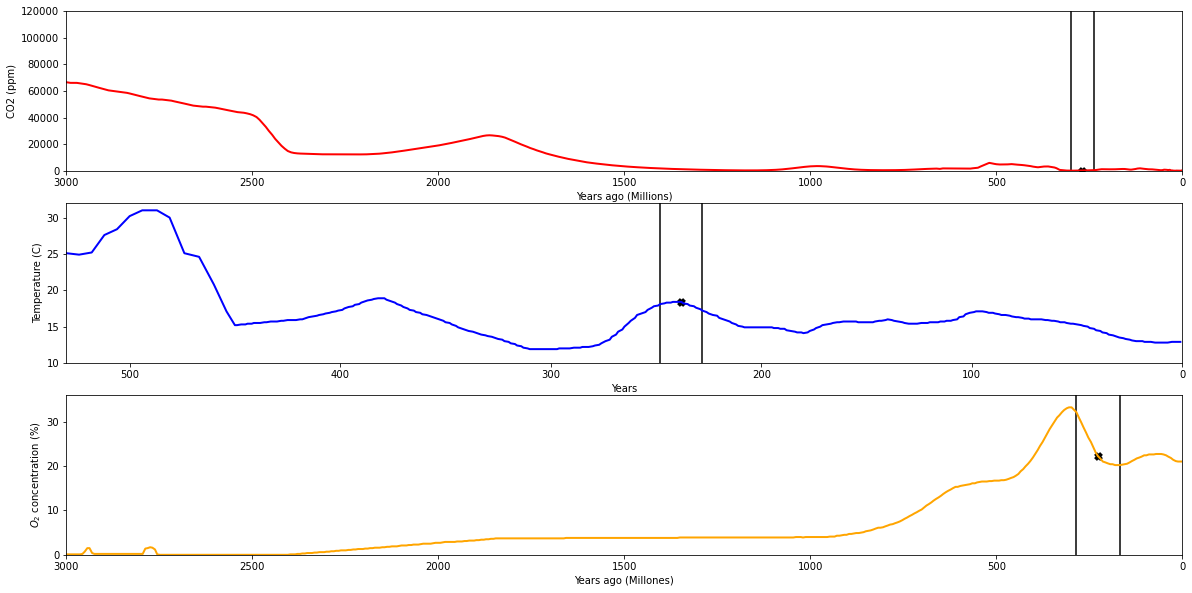

In [239]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
#plt.plot(earlyo2["Ma"],earlyo2["%O2"],c="red",linewidth=4)
plt.plot(paleoco2["Ma"],paleoco2["ppm"],c="red",linewidth=2)
dotco2=1161
plt.scatter(paleoco2["Ma"][dotco2],paleoco2["ppm"][dotco2],c="black",linewidth=4,marker="x")
plt.vlines(paleoco2["Ma"][dotco2]-30,ymin=-10000,ymax=1400000)
plt.vlines(paleoco2["Ma"][dotco2]+30,ymin=-10000,ymax=1400000)
plt.ylim(0,120000)
plt.xlim(3000, 0)
plt.xlabel("Years ago (Millions)")
plt.ylabel("CO2 (ppm)")



plt.subplot(3,1,2)
plt.plot(paleotemp["Ma"],paleotemp["Temp °C"],c="b",linewidth=2)
dottemp=154
plt.scatter(paleotemp["Ma"][dottemp],paleotemp["Temp °C"][dottemp],c="black",linewidth=4,marker="x")
plt.xlabel("Years")
plt.ylabel("Temperature (C)")
plt.ylim(10,32)
plt.xlim(530, 0)
plt.vlines(paleotemp["Ma"][dottemp]-10,ymin=-10000,ymax=1400000)
plt.vlines(paleotemp["Ma"][dottemp]+10,ymin=-10000,ymax=1400000)



plt.subplot(3,1,3)
plt.plot(earlyo2["Ma"],earlyo2["%O2"],c="orange",linewidth=2)
doto2=35
plt.scatter(earlyo2["Ma"][doto2],earlyo2["%O2"][doto2],c="black",linewidth=4,marker="x")
plt.ylim(0,36)
plt.xlim(3000, 0)
plt.xlabel("Years ago (Millones)")
plt.ylabel("$O_2$ concentration (%)")


plt.vlines(earlyo2["Ma"][doto2]-60,ymin=-10000,ymax=1400000)
plt.vlines(earlyo2["Ma"][doto2]+60,ymin=-10000,ymax=1400000)
#plt.xlim(4560, 0)